<a href="https://colab.research.google.com/github/BhumikaSinghGajo/retail-sales-prediction-project/blob/main/ML_Regression_Retail_sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -**  Bhumika singh


# **Project Summary -**

There are 1,115 Rossmann stores for which I have historical sales data.Since some stores were temporarily closed for reimbursement, sales during the six weeks that I have to forecast the sales for the upcoming were zero. There are two datasets I own.Importing both datasets came first.A dataset that includes 1017209 rows and 9 columns is the Rossman Store dataset.Both null and duplicate values are absent from the dataset.Details regarding the kind of store, the number of customers it serves, and the sales figures for each store are provided.Additionally, ascertain whether weekend store closures or any form of state or school holiday had an impact on sales.Additionally, it details how applying a promo affected sales.The additional

I filled in some feartures that have very few null values and removed some columns from the store dataset that had too many null values. I then combined the two datasets.After looking for outliers, I found a few columns that had them, so I used the percentile approach to handle those.

I then carried out EDA (univeriate, biveriate, and multiveriate analysis) on the data to get some insightful information.After that, I carried out feature engineering and data preprocessing, which involved label encoding for categorical features, defining a few new features, calculating VIF to determine the multicolinearity of the features, and choosing key features for additional investigation.After dividing the data into independent and dependent variables, I used Standard Scaler to transform the data.With a test size of 0.2, I then divided the data into x_train, y_train,x_test, and y_test.

Finally, I applied various models to my data, including XGBoost, Elastic Net, Decision Tree, Random Forest, Ridge, Lasso, and Linear Regression. I've decided to use the XGBoost model as the final prediction model based on how well each model performed overall. The



# **GitHub Link -**

Provide your GitHub Link here: https://github.com/BhumikaSinghGajo/retail-sales-prediction-project





# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European Countries.Currently,Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance.Store sales are influenced by many factors,including promotions,competition,school and state holidays,seasonality,and loclity.With thousands of individual managers predicting sales based on their unique circumstance the accuracy of result can be quite varied.You are provided with historical sales data for 1,115 Rossmann stores.The task is to forecast the 'Sales' column for the test set.Note that some stores in the dataset were temporarily closed for reburisment



#### **Define Your Business Objective?**

Product interest continues to fluctuate from time to time. No company can focus on financial growth without accurately determining the interest of its customers and the future demand for its products. The process of projecting demand or sales of a specific product over a given time period is known as sales forecasting. In this project, a machine learning model for sales forecasting will be developed and a real-world business problem will be solved.

Here, our objective is to project each store's sales for the next six weeks, identify the variables that affect it, and offer suggestions for raising the figures.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
 Explain the ML Model used and it's performance using Evaluation metric Score

*   Explain the ML Model used and it's performance using Evaluation metric Score chart
*   Cross- Validation & Hyperparameter Tuning


*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import math
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-a47efdc56f76>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
ross_store= pd.read_csv("/content/drive/MyDrive/ML PROJECT/Rossmann Stores Data (1).csv")
store= pd.read_csv("/content/drive/MyDrive/ML PROJECT/store.csv")

### Dataset First View

In [ ]:
# Dataset First Look
ross_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
# Dataset First Look of store dataset
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Dataset Rows & Columns count

In [ ]:
# ross_store Dataset Rows & Columns count
print(f'Shape of dataset is :{ross_store.shape}')
print(f'Our dataset contains {ross_store.index.value_counts().sum()} Rows')
print(f'Our dataset contains {ross_store.columns.value_counts().sum()} Columns')

Shape of dataset is :(1017209, 9)
Our dataset contains 1017209 Rows
Our dataset contains 9 Columns


In [ ]:
#store data set Rows & column count
print(f'Shape of dataset is :{store.shape}')
print(f'Our dataset contains {store.index.value_counts().sum()} Rows')
print(f'Our dataset contains {store.columns.value_counts().sum()} Column')

Shape of dataset is :(1115, 10)
Our dataset contains 1115 Rows
Our dataset contains 10 Column


### Dataset Information

In [ ]:
# ross_store Dataset Info
ross_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**Points to be noted:**

1.Ross store dataset does not contain any null value

2.Date and StateHoliday dtype is object

In [ ]:
#store dataset info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Points to be noted:**

1.There are many null values present in this dataset

2.StoreType and Assortment has object datatype

#### Duplicate Values

In [ ]:
# ross_store Dataset Duplicate Value Count
ross_store.duplicated().any()

False

Ross_store dataset doesn't contain any duplicate value


In [ ]:
# store Dataset Duplicate Value Count
store.duplicated().any()

False

Store dataset doesn't contain any duplicated values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
ross_store.isnull().sum().sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
print(store.isnull().sum().sort_values(ascending=False))
print('--'*20)
print('Percentage Null Value')
print(round(store.isnull().sum().sort_values(ascending=False)*100/len(store),2))

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64
----------------------------------------
Percentage Null Value
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
CompetitionDistance           0.27
Store                         0.00
StoreType                     0.00
Assortment                    0.00
Promo2                        0.00
dtype: float64


There are too many columns which contain null values of high percentage

In [ ]:
#describe the dataset
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
ross_store.describe(percentiles=percentiles)

Store  DayOfWeek   Sales  Customers    Open   Promo  SchoolHoliday
count 1017209    1017209 1017209    1017209 1017209 1017209        1017209
mean      558          4    5774        633       1       0              0
std       322          2    3850        464       0       0              0
min         1          1       0          0       0       0              0
1%         11          1       0          0       0       0              0
25%       280          2    3727        405       1       0              0
50%       558          4    5744        609       1       0              0
75%       838          6    7856        837       1       1              0
95%      1060          7   12137       1362       1       1              1
99%      1104          7   17160       2267       1       1              1
max      1115          7   41551       7388       1       1              1

There are some columns which contains outliers like Sales,customers

In [ ]:
#describe dataset
store.describe(percentiles=percentiles)

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count   1115                 1112                        761   
mean     558                 5405                          7   
std      322                 7663                          3   
min        1                   20                          1   
1%        12                   50                          1   
25%      280                  718                          4   
50%      558                 2325                          8   
75%      836                 6882                         10   
95%     1059                20145                         12   
99%     1104                35145                         12   
max     1115                75860                         12   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
count                       761    1115              571              571  
mean                       2009       1               24             2012  
std                           6       1               14                2  
min                        1900       0                1             2009  
1%                         1994       0                1             2009  
25%                        2006       0               13             2011  
50%                        2010       1               22             2012  
75%                        2013       1               37             2013  
95%                        2014       1               45             2014  
99%                        2015       1               48             2015  
max                        2015       1               50             2015

**CompetitionDistance column contain outlier :**

Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear contains too many null values

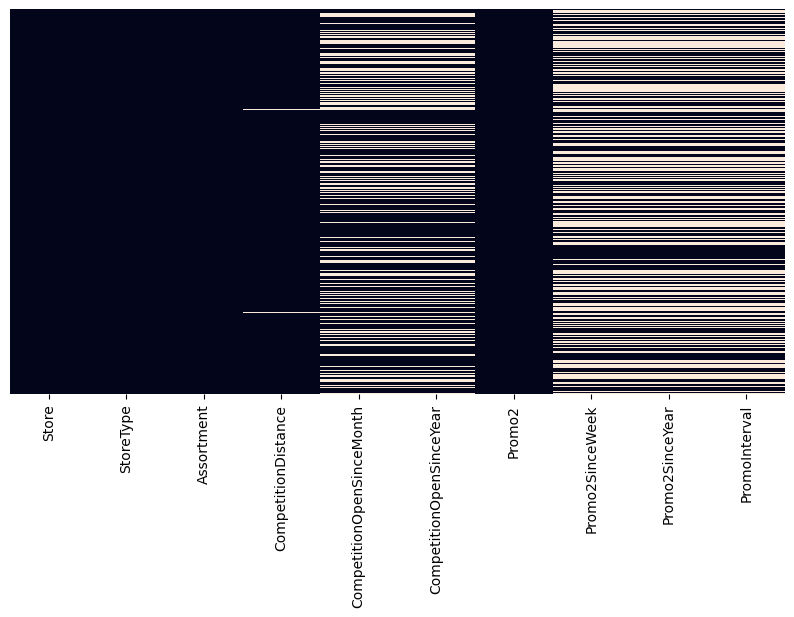

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(store.isnull(),cbar=False,yticklabels=False)
plt.show()

### What did you know about your dataset?

1.We have a dataset of rosmann company.One dataset is roaaman store which contains 1017209 rows and 9 columns.The dataset doesn't contain any null or duplicated values.It gives us inforamation about the type of store,sales in each store by what date through how many number of customers.Also whether the sale was affected by closure of shop on weekends or or any kind of stateholiday or schoolholiday.It also gives on how sales was affected on applying promo


2.The other dataset is store which has 1115 Rows and 10 Column.This dataset contains too many null values in different columns.which needs to be taken care in upcoming steps.It provides information like type of store and what is assostment level used in store,how far away is competitor from store,since how long is competitor there in the market and how often is promo applied on the store


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
ross_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Variables Description

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Store** - a unique Id that represents store:

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - whether the store was open or not: 0 = closed, 1 = open

**StateHoliday** - state holiday or not

**SchoolHoliday** - SchoolHoliday or not

**StoreType** - what is the type of the store: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - store running consecutive promotion or not

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_vals =ross_store.apply(lambda col: col.unique())
print(unique_vals)
print('*'*20)
print('Unique Values Count')
print(ross_store.apply(lambda col: col.nunique()))

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object
********************
Unique Values Count
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [ ]:
unique_vals =store.apply(lambda col: col.unique())
print(unique_vals)
print('*'*40)
print('Unique Values Count')
print(store.apply(lambda col: col.nunique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object
****************************************
Unique Values Count
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#dropping coluns from store dataset which contains too many null values
store.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'],axis=1,inplace=True)

In [ ]:
#filling null values in competitiondistance column with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)

In [ ]:
#merging both the dataset
data=ross_store.merge(store,on='Store',how='left')

In [ ]:
#first look of the merged dataset
data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  
0              1         c          a                 1270       0  
1              1         a          a                  570       1  
2              1         a          a                14130       1  
3              1         c          c                  620       0  
4              1         a          a                29910       0

In [ ]:
#shape of the dataset
data.shape

(1017209, 13)

In [ ]:
# creating year,month,week_num column from Date Column
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['week_num'] = data['Date'].dt.isocalendar().week

In [ ]:
#dropping date column from data
data.drop(columns='Date',axis=1,inplace=True)

**Outlier Treatment**

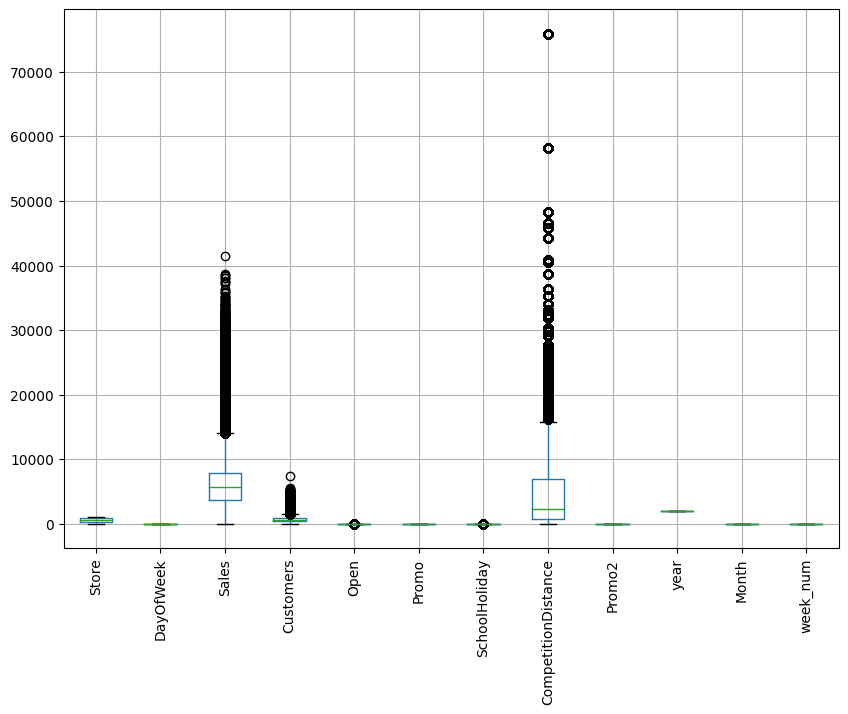

In [ ]:
#Now let's deal with the outliers
plt.figure(figsize=(10,7))
data.boxplot()
plt.xticks(rotation='vertical')
plt.show()

Columns like Sales,CompetitionDistance and customers contains Outliers but CompetitionDistance contains maximum

In [ ]:
#find out 90,95,99 percentile values of Competition distance column
percentiles=[0.90,0.95,0.99]
data['CompetitionDistance'].describe(percentiles=percentiles)

count   1017209
mean       5422
std        7707
min          20
50%        2325
90%       15710
95%       20390
99%       36410
max       75860
Name: CompetitionDistance, dtype: float64

From this we can see that 99% value is around 36K and maximum value is around 75K,so let's consider only value around 95%

In [ ]:
#find out 90,95,99 percentile values of Sales Column
data['Sales'].describe(percentiles=percentiles)

count   1017209
mean       5774
std        3850
min           0
50%        5744
90%       10288
95%       12137
99%       17160
max       41551
Name: Sales, dtype: float64

In sales Feature also outliers is there and let's consider only those value around 95%

In [ ]:
#find out 90,95,99 percentile values of Customers Column
data['Customers'].describe(percentiles=percentiles)

count   1017209
mean        633
std         464
min           0
50%         609
90%        1116
95%        1362
99%        2267
max        7388
Name: Customers, dtype: float64

Here also let's consider value around 1400 that is around 95%

In [ ]:
#let's first create copy of our dataset
df=data.copy()

In [ ]:
#shape before outlier treatment
df.shape

(1017209, 15)

**Treating Outliers**

In [ ]:
#let's consider all the values in which competition distance and sales,Customers values are around 95% percentile
df=df[df['CompetitionDistance']<20000]
df=df[df['Customers']<1400]
df=df[df['Sales']<13000].reset_index(drop=True)

In [ ]:
#shape of the data after the outlier treatment
df.shape

(908510, 15)

In [ ]:
#let's convert stateholiday into state_holiday yes(1) or no(0)
df['state_holiday'] = data['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

In [ ]:
#drop stateholiday column from the dataset
df.drop(columns='StateHoliday',axis=1,inplace=True)

### What all manipulations have you done and insights you found?

1.first of all i dropped all the columns which includes 'PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth' from the store dataset as these contains too many null values

2.After that i filled null values of competitiondistance column of store dataset with median values

3.Then i merged both the dataset

4.Then i created Year,Month,Week_num Columns from the Date column of the dataset and i then droped the Date Column

5.Then i visvalize the outliers of the data using boxplot and it was found out that columns like Competitiondistance,Sales,Customer has maximum outlier

6.Then i consider around 95% percentile values in order to get rid of some outliers

7.Then i convert StateHoliday Column into into another column satetholiday in which i consider 0 as No holiday and 1 as Holiday and i also dropped StateHoliday Column from the dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 **Sales Vs DayOfWeek**

In [ ]:
# Chart - 1 visualization code
#creating a dataset where ['Sales']!=0
df1=df[df['Sales']!=0]

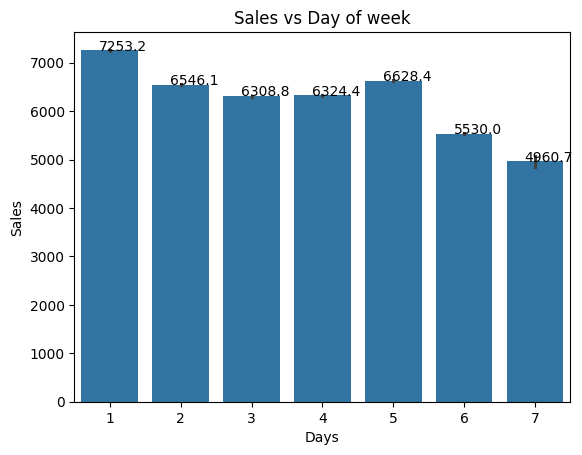

In [ ]:
#Chart 1 Sales Per Day
#Bivariate Analysis
ax=sns.barplot(x=df1['DayOfWeek'],y=df1['Sales'])
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Sales vs Day of week')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

**1. Why did you pick the specific chart?**

I used a seaborn barplot to determine the sales for the previous week.

**2. What is/are the insight(s) found from the chart?**

It has been determined that Day-1, or Monday, has the highest sales, and Day-7, or Sunday, has the lowest.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

It is evident from the barplot that sales started to decline after day one.Enough steps should be taken to investigate this.





Answer Here

#### Chart - 2 **Sales vs Promo**


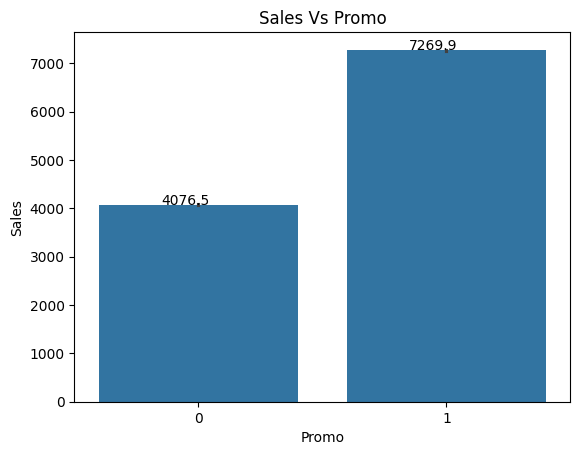

In [ ]:
# Chart - 2 visualization code
#Bivariate Analysis
ax=sns.barplot(x=df['Promo'],y=df['Sales'])
plt.title('Sales Vs Promo')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**1. Why did you pick the specific chart?**

Barplot is what I used to determine how sales and promotions relate to one another.


**2. What is/are the insight(s) found from the chart?**



Sales have been found to nearly double when a promotion is underway.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Businesses should try to run more promotions to increase sales, especially on the days when sales are at their lowest.


#### Chart - 3 **Sales in Different Months**

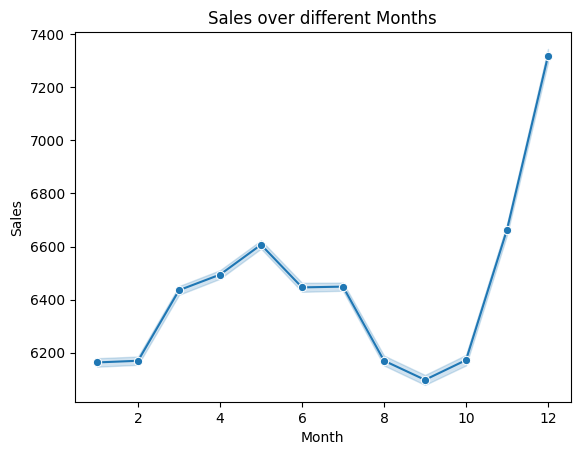

In [ ]:
# Chart - 3 visualization code
#Bivariate Analysis
ax=sns.lineplot(x=df1['Month'],y=df1['Sales'],marker='o')
plt.title('Sales over different Months')
plt.show()

**1. Why did you pick the specific chart?**

My chosen lineplot displays the sales trend over the past month.


**2. What is/are the insight(s) found from the chart?**

It is evident that sales increase significantly after October, which may be related to festival season.December displays the highest sales, possibly as a result of Christmas and New Year's

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

The plot indicates that May sales have decreased, so management should pay attention to this and consider running any promotions to boost sales.


#### Chart - 4 **Sales in different Stores Over Different Years**

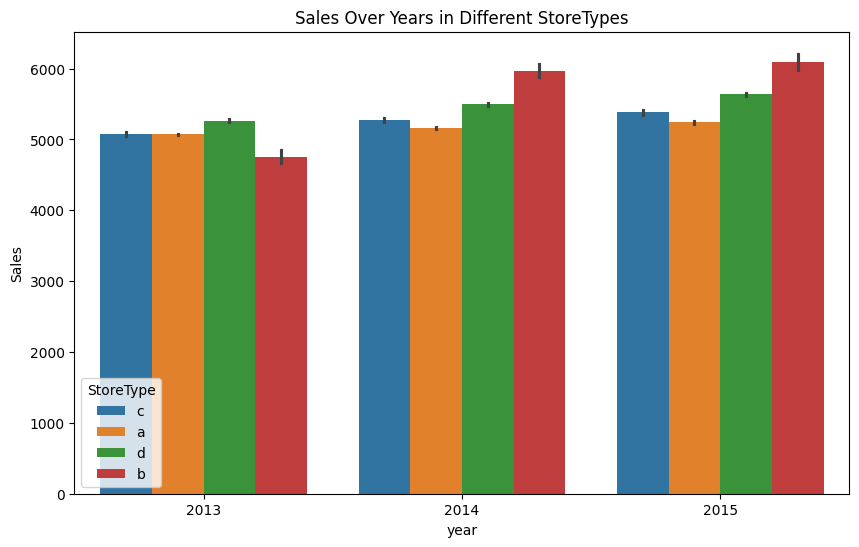

In [ ]:
# Promo 2 since weeks
#Multivariate Analysis
plt.figure(figsize=(10,6))
sns.barplot(x=df['year'],y=df['Sales'],hue=df['StoreType'])
plt.title('Sales Over Years in Different StoreTypes')
plt.show()

**1. Why did you pick the specific chart?**

I've chosen a barplot to determine sales for various store types over the course of a year.

**2. What is/are the insight(s) found from the chart?**

It was discovered that store b's sales had stopped between 2013 and 2015, with store d having the highest sales in that year and store b having the highest sales in the remaining years.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

The graph indicates that while sales in other store types stayed relatively constant over the years, sales in the B store type increased.Thus, other stores ought to attempt to employ the same business strategies as store B.


#### Chart - 5 **Sales vs School Holiday**

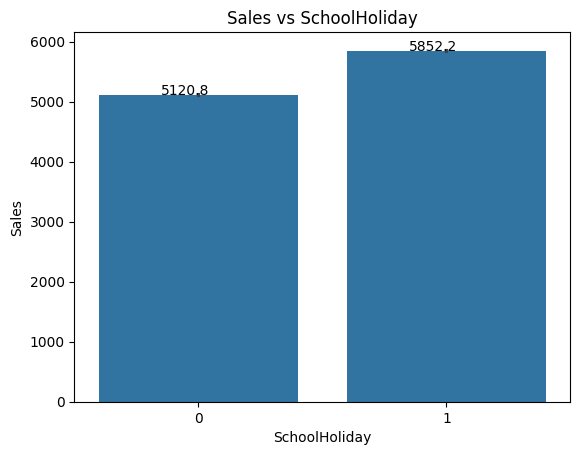

In [ ]:
# Chart - 5 visualization code
#Bivaraite Analysis
ax=sns.barplot(x=df['SchoolHoliday'],y=df['Sales'])
plt.title('Sales vs SchoolHoliday')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**1. Why did you pick the specific chart?**

I've chosen to use Barplot to determine how School Holidays affect sales.


**2. What is/are the insight(s) found from the chart?**

The graph shows that very strong sales occur on school holidays, but that good sales also occur on non-holidays, indicating that school holidays have little effect on sales.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Since sales fluctuate very little and reach their peak during school breaks.Therefore, the management must take this into account in order to boost sales during the school holiday.


#### Chart - 6 **sales vs state-holiday**

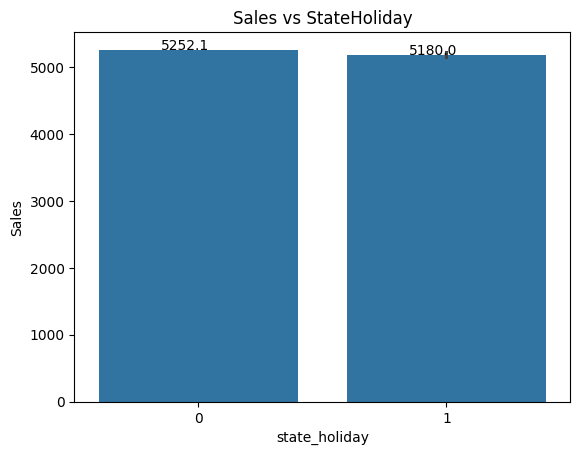

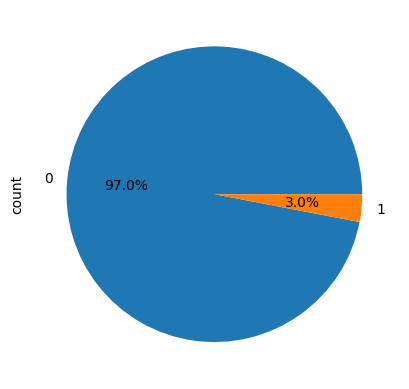

In [ ]:
# Chart - 6 visualization code
#Bivariate Analysis
#plotting barplot
ax=sns.barplot(x=df['state_holiday'],y=df['Sales'])
plt.title('Sales vs StateHoliday')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
#plotting pie chart
df['state_holiday'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

**1. Why did you pick the specific chart?**

I have chosen barplot and pie-chart to determine the extent to which any kind of state holiday affects sales.


**2. What is/are the insight(s) found from the chart?**




It is clear from the barplot that good sales occur on both occasions regardless of state holidays, and it is also evident from the pie chart that the impact of state holidays is limited to 3% of total sales.Thus, state holidays have no bearing on overall sales.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Holiday sales are unaffected by state holidays.



#### Chart - 7 **Sales vs Assostment Level**

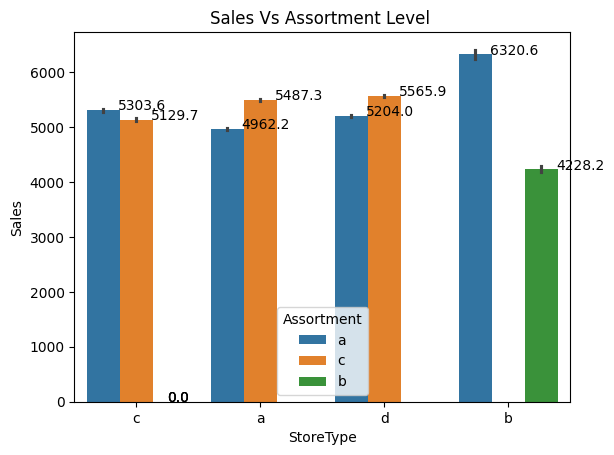

In [ ]:
# Chart - 7 visualization code
#Multivaraite Analysis
ax=sns.barplot(x=df['StoreType'],y=df['Sales'],hue=df['Assortment'])
plt.title('Sales Vs Assortment Level ')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**1. Why did you pick the specific chart?**

Barplot is the tool I've chosen to visualize sales across various store types and assortment levels.


**2. What is/are the insight(s) found from the chart?**




The plot indicates that only assortments A and B have been used in Store B, and that assortment A has had the greatest sales.

Additionally, the remaining stores only offered A and C assortment levels, yet their sales were comparable.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

The graph indicates that not all assortment levels were utilized in any store, so management ought to make an effort to utilize all available assortment levels.

#### Chart - 8 **Sales Vs Customer**

Text(0.5, 1.0, 'Sales vs Customer')

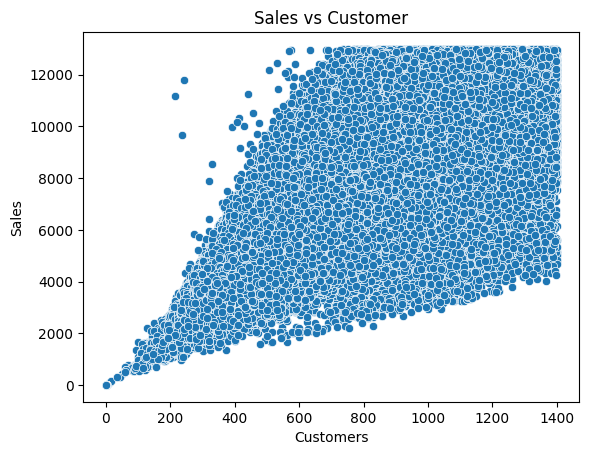

In [ ]:
# Chart - 8 visualization code
#Bivariate Analysis
sns.scatterplot(x=df['Customers'],y=df['Sales'])
plt.title('Sales vs Customer')

**1. Why did you pick the specific chart?**

To determine the relationship between customers and sales, I used a scatter plot.


**2. What is/are the insight(s) found from the chart?**

The plot revealed a positive correlation between the number of customers and sales, meaning that the more customers that visit the store, the higher the sales will be.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

To boost sales, management should always strive to draw in an increasing number of clients.


#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 **sales vs competitiondance**

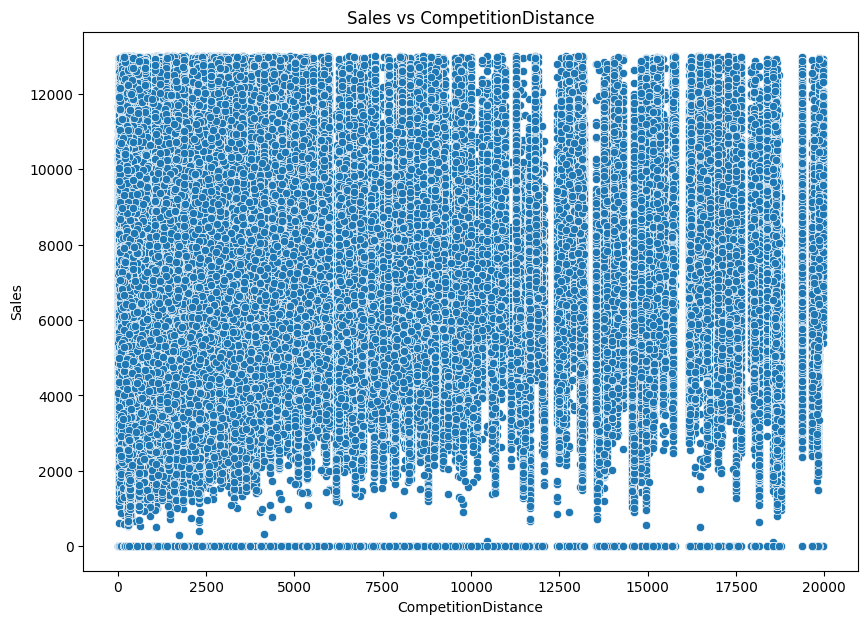

In [ ]:
# Chart - 10 visualization code
#Bivariate Analysis
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['CompetitionDistance'],y=df['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.show()

**1. Why did you pick the specific chart?**

To determine the relationship between sales and competition distance, I used a scatter plot.


**2. What is/are the insight(s) found from the chart?**

It is evident that the majority of the stores that are strategically close to one another have higher sales.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Due to intense competition, store owners must run appealing promotions to draw in more clients and boost sales in order to maintain growth.



#### Chart - 11 **Sales Vs Promo 2**

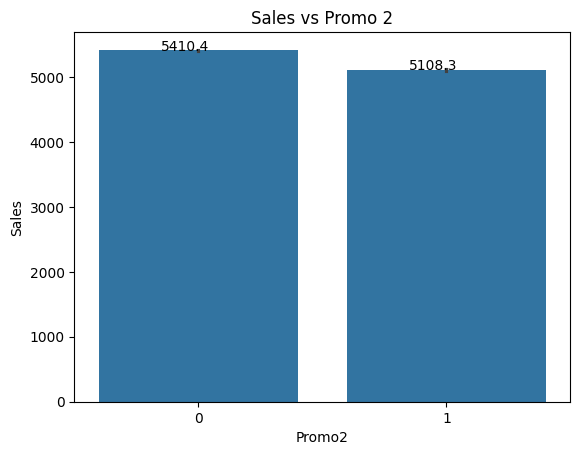

In [ ]:
# Chart - 11 visualization code
#Bivariate Analysis
ax=sns.barplot(x=df['Promo2'],y=df['Sales'])
plt.title('Sales vs Promo 2')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**1. Why did you pick the specific chart?**

I used a barplot to determine how promotion #2 affected sales.


**2. What is/are the insight(s) found from the chart?**

It can be seen from the graph that Running promo continously has not been that much effective towards increasing Sales

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Given that running a promotion continuously hasn't done much to increase sales, management should either discontinue this offer or run it in a more efficient manner.


#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - **Correlation Heatmap**

<Axes: >

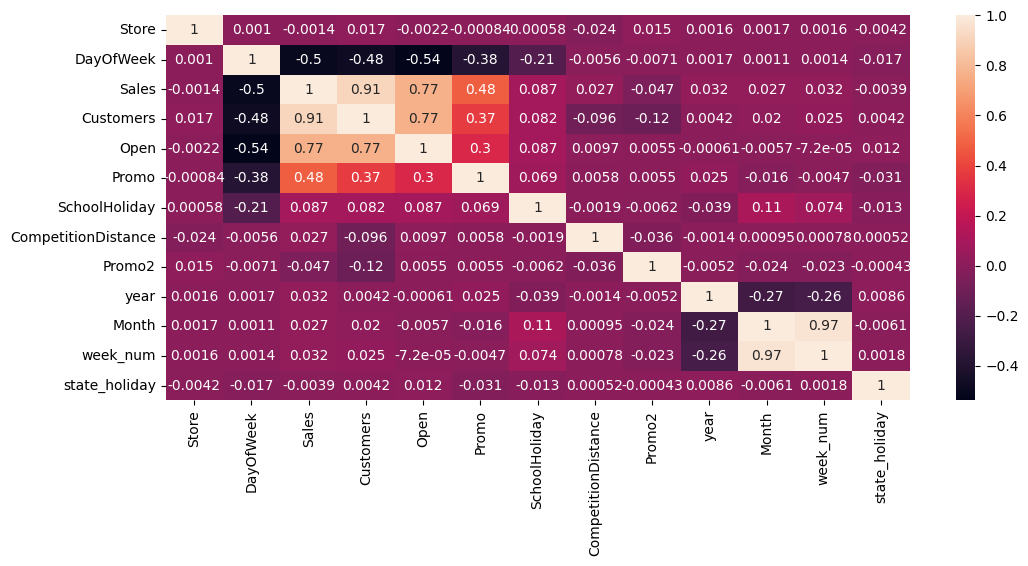

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
#Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Calculate correlation matrix
corr = df_numeric.corr()
sns.heatmap(corr,annot=True)

**1. Why did you pick the specific chart?**

I've selected the heatmap to determine how each feature is correlated with the others.


**2. What is/are the insight(s) found from the chart?**

1. It has been discovered that there is a positive correlation between sales and promotions, which means that when a store runs a promotion, more customers will visit it, which will increase sales.

2. The store will be closed on weekends, there won't be any sales, and there is also a negative correlation between the day of the week and competition distance.

3. There is no discernible negative correlation between state holidays and sales, just as there is no relationship between school holidays and sales.
There is multicolinearity between open column, customers, and promotions.


#### Chart - 15 - Pair Plot

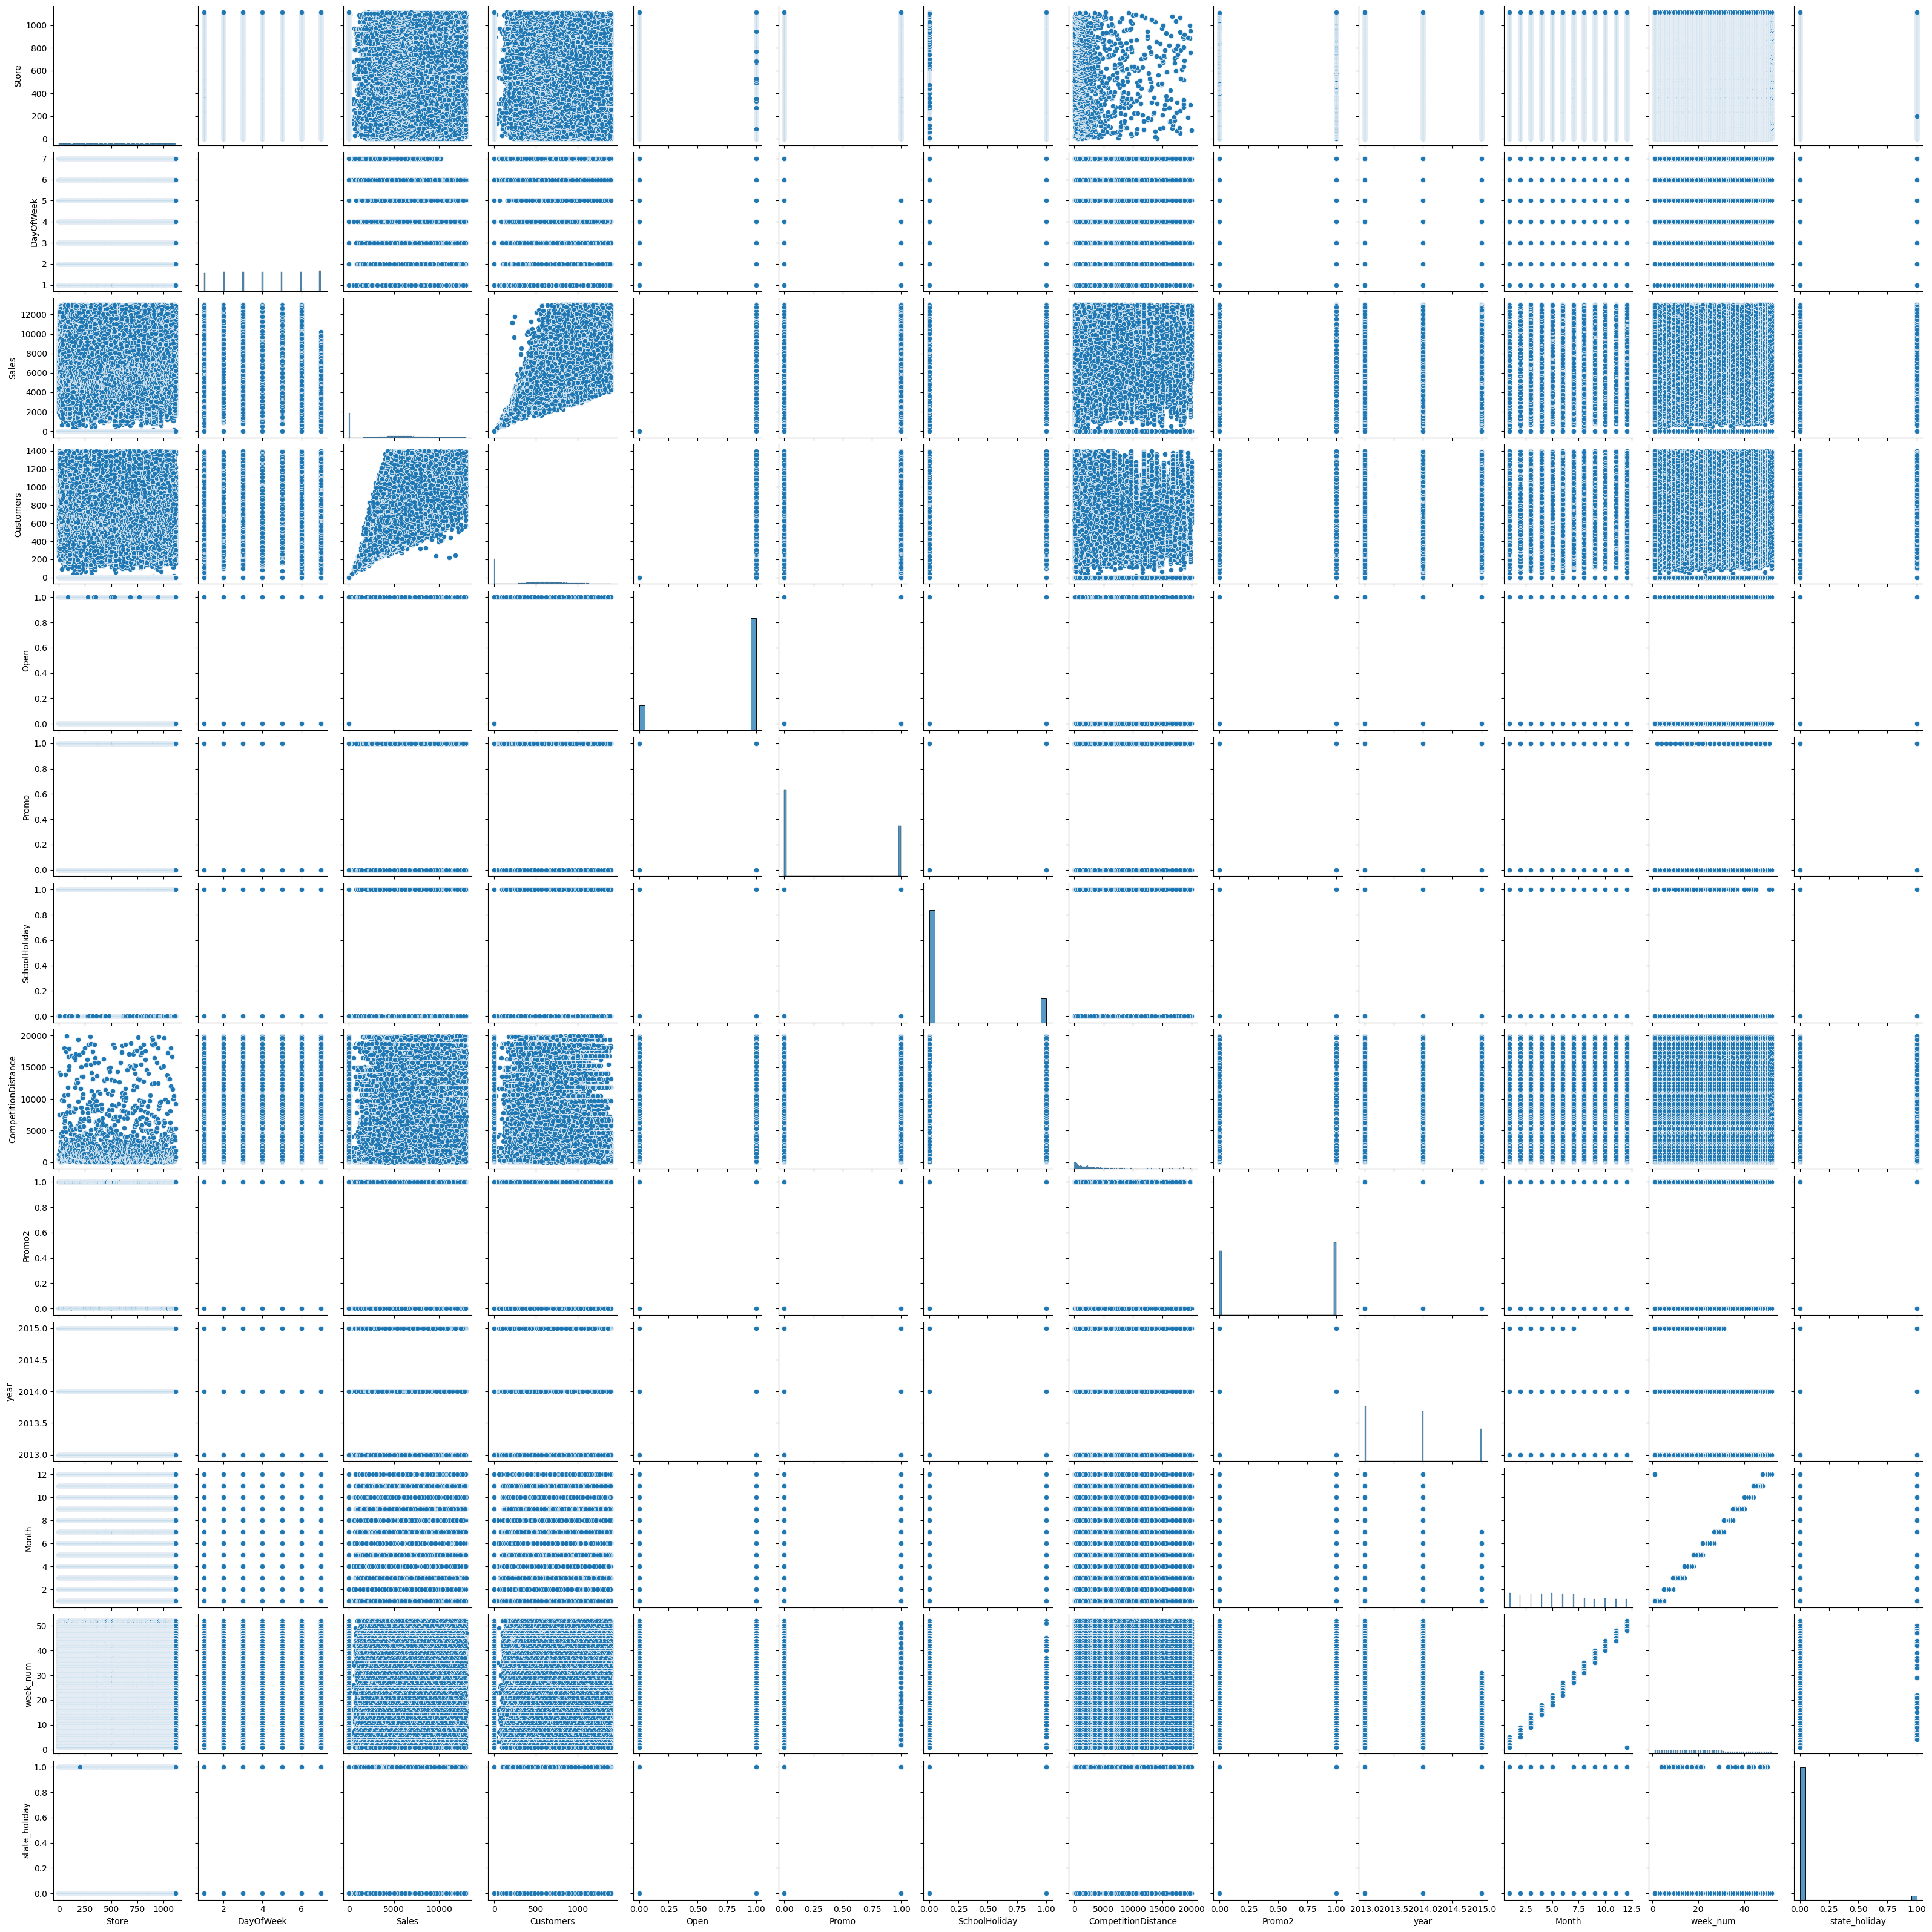

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

**1. Why did you pick the specific chart?**

I used pairplot to view multiple visuals simultaneously on the whole dataset.

**2. What is/are the insight(s) found from the chart?**

The graph shows all the characteristics that are positively correlated with sales.


# **5. Hypothesis Testing**

**Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**

1.Null Hypothesis: There is no relationship between Sales and Customers

2.ALternative Hypothesis: There is relationship between Sales and Customers

3.Null Hypothesis: There is no relationship between Sales and Promo

4.ALternative Hypothesis:There is relationship between Sales and Promo

5.Null Hypothesis: There is no relationship between Sales and DayOfWeek

6.ALternative Hypothesis: There is relationship between Sales and DayOfWeek

**Hypothetical Statement - 1**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

*   Null Hypothesis: There is no relationship between Sales and Customers
*   ALternative Hypothesis: There is relationship between Sales and Customers

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
customers = df['Customers']

correlation, p_value = pearsonr(sales, customers)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Customers.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Customers.")

Pearson correlation coefficient: 0.9124953576449817
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Customers.


**Which statistical test have you done to obtain P-Value?**

I have tested the hypothesis using the Pearson correlation coefficient to determine the relationship between two variables (sales and customers). The linear relationship between two variables' strength and direction are measured by the Pearson correlation coefficient.

**Why did you choose the specific statistical test?**

I'm using the Pearson method to determine the correlation coefficient and P value between the two features.It assists me in determining the value of the Corelation Coefficient, which is between -1 and 1. Perfect positive correlation is represented by a correlation value of 1, strong negative relationships are represented by a correlation value of -1, and no relationship is represented by a correlation value of 0. The statistical significance of the correlation is also ascertained with the aid of the P-value.The correlation is significant and gives us reason to reject the null hypothesis if the p-value is less than the significance value, which is typically taken as 0.05.


# **Hypothetical Statement - 2**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: There is no relationship between Sales and Promo

ALternative Hypothesis:There is relationship between Sales and Promo

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Valuefrom scipy.stats import pearsonr

sales = df['Sales']
promo = df['Promo']

correlation, p_value = pearsonr(sales, promo)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and Promo.")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and Promo.")

Pearson correlation coefficient: 0.4809472646793369
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and Promo.


**Which statistical test have you done to obtain P-Value?**


I have tested the hypothesis using the Pearson correlation coefficient to determine the relationship between two variables (Sales and Promo). The linear relationship between two variables' strength and direction are measured by the Pearson correlation coefficient.


**Why did you choose the specific statistical test?**

I'm using the Pearson method to determine the correlation coefficient and P value between the two features.It assists me in determining the value of the Corelation Coefficient, which is between -1 and 1. Perfect positive correlation is represented by a correlation value of 1, strong negative relationships are represented by a correlation value of -1, and no relationship is represented by a correlation value of 0. The statistical significance of the correlation is also ascertained with the aid of the P-value.The correlation is significant and gives us reason to reject the null hypothesis if the p-value is less than the significance value, which is typically taken as 0.05.


# **Hypothetical Statement - 3**

**1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis: There is no relationship between Sales and SchoolHoliday

ALternative Hypothesis: There is relationship between Sales and SchoolHoliday

**2. Perform an appropriate statistical test.**

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

sales = df['Sales']
Schoolholiday= df['SchoolHoliday']

correlation, p_value = pearsonr(sales, Schoolholiday)

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .")
else:
    print("Accept the null hypothesis. There is no significant relationship between Sales and SchoolHoliday.")

Pearson correlation coefficient: 0.0871285783009051
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Sales and SchoolHoliday .


**Which statistical test have you done to obtain P-Value?**

In order to find out the relationship between two variables (Sales and Promo), i have used the Pearson correlation coefficient to test the hypothesis. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

**Why did you choose the specific statistical test?**

I'm using the Pearson method to determine the correlation coefficient and P value between the two features.It assists me in determining the value of the Corelation Coefficient, which is between -1 and 1. Perfect positive correlation is represented by a correlation value of 1, strong negative relationships are represented by a correlation value of -1, and no relationship is represented by a correlation value of 0. The statistical significance of the correlation is also ascertained with the aid of the P-value.The correlation is significant and gives us reason to reject the null hypothesis if the p-value is less than the significance value, which is typically taken as 0.05.


## **6. Feature Engineering & Data Pre-processing**

**1. Handling Missing Values**

In [ ]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908510 entries, 0 to 908509
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                908510 non-null  int64  
 1   DayOfWeek            908510 non-null  int64  
 2   Sales                908510 non-null  int64  
 3   Customers            908510 non-null  int64  
 4   Open                 908510 non-null  int64  
 5   Promo                908510 non-null  int64  
 6   SchoolHoliday        908510 non-null  int64  
 7   StoreType            908510 non-null  object 
 8   Assortment           908510 non-null  object 
 9   CompetitionDistance  908510 non-null  float64
 10  Promo2               908510 non-null  int64  
 11  year                 908510 non-null  int32  
 12  Month                908510 non-null  int32  
 13  week_num             908510 non-null  UInt32 
 14  state_holiday        908510 non-null  int64  
dtypes: UInt32(1), flo

In [ ]:
#let's change the datatype of CompetitionDistance to int
df['CompetitionDistance']=df['CompetitionDistance'].astype('int')

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
year                   0
Month                  0
week_num               0
state_holiday          0
dtype: int64

**2. Handling Outliers**

**What all outlier treatment techniques have you used and why did you use those techniques?**

When analyzing data, outliers can produce skewed insights and conclusions.Therefore, before putting the data into our model, we should handle the outliers.Outliers were found in only three categories in our dataset: sales, customers, and competition distance. I eliminated these outliers during the EDA process by removing all values that were higher than the 95 percentile.


**3. Categorical Encoding**

StoreType,Assortment Column Contains Categorical Values So, i have to Encode them

In [ ]:
#Encode the cetagorical columns
#Encode StoreType,Assortment column using One Hot Encoding
encoded_df = pd.get_dummies(df, columns=['StoreType','Assortment'],dtype=int,drop_first=True)

In [ ]:
#head of the data after categorical encoding
encoded_df.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5   5263        555     1      1              1   
1      2          5   6064        625     1      1              1   
2      3          5   8314        821     1      1              1   
3      6          5   5651        589     1      1              1   
4      8          5   8492        833     1      1              1   

   CompetitionDistance  Promo2  year  Month  week_num  state_holiday  \
0                 1270       0  2015      7        31              0   
1                  570       1  2015      7        31              0   
2                14130       1  2015      7        31              0   
3                  310       0  2015      7        31              0   
4                 7520       0  2015      7        31              0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  
0            0            1            0             0             0  
1            0            0            0             0             0  
2            0            0            0             0             0  
3            0            0            0             0             0  
4            0            0            0             0             0

**What all categorical encoding techniques have you used & why did you use those techniques?**

StoreType and Assortment are categorical features in our dataframe, so I used get_dummies to encode these features. One Hot Encoding: This pandas function preserves the original column names and makes it simple to interpret and explore the encoded categorical variables. It is straightforward and simple to use, requiring only one line of code to accomplish.


# **4. Feature Manipulation & Selection**

**1. Feature Manipulation**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#let's calculate the VIF to find Multicolinearity between the features
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(data)

# Check the columns in the DataFrame
print("Columns in DataFrame:", df.columns.tolist())

# Ensure you are selecting the correct columns
columns_to_select = ['Store','DayOfWeek','Customers','Open','Promo',
                     'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'year', 'Month',
                     'week_num', 'state_holiday', 'StoreType_b', 'StoreType_c',
                     'StoreType_d', 'Assortment_b', 'Assortment_c']

# Verify if all columns are present in the DataFrame
missing_columns = [col for col in columns_to_select if col not in df.columns]
if missing_columns:
    print("Missing columns:", missing_columns)
else:
    # Select the correct columns
    X = df[columns_to_select]

    # Ensure all columns are numeric and handle errors by coercing to NaN
    X = X.apply(pd.to_numeric, errors='coerce')

    # Fill NaN values with the mean of each column
    X.fillna(X.mean(), inplace=True)

    # Ensure there are no infinite values
    if np.isinf(X).values.any():
        X.replace([np.inf, -np.inf], np.nan, inplace=True)
        X.fillna(X.mean(), inplace=True)

    # Calculate VIF
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(vif)


Columns in DataFrame: ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2', 'year', 'Month', 'week_num']
Missing columns: ['state_holiday', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c']


Here Since many of the features have extremely high Multicolinearity, some must be excluded.

1.Week_no feature has a very high correlation with week number, i.e., 0.97; their respective correlations with sales are 0.027 and 0.032, so we will keep this feature.

2.Customer and open feature also have a high VIF value; their correlations with each other and with sales are 0.91 and 0.77, respectively, so we will drop the open column.


In [ ]:
# After Analysing all feature and Removing those features having high corelation
#calculating VIF again
X=encoded_df[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


               Variable  VIF
0                 Store    4
1             DayOfWeek    4
2             Customers    4
3                 Promo    2
4         SchoolHoliday    1
5   CompetitionDistance    2
6                Promo2    2
7                 Month    4
8         state_holiday    1
9           StoreType_b    2
10          StoreType_c    1
11          StoreType_d    2
12         Assortment_b    2
13         Assortment_c    2


Here VIF is now less than 5 for all features

**2. Feature Selection**

In [ ]:
# Selecting only those features which are important
new_df=encoded_df[[ 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month',
        'state_holiday', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c','Sales']]

In [ ]:
new_df.head()

DayOfWeek  Customers  Promo  SchoolHoliday  CompetitionDistance  Promo2  \
0          5        555      1              1                 1270       0   
1          5        625      1              1                  570       1   
2          5        821      1              1                14130       1   
3          5        589      1              1                  310       0   
4          5        833      1              1                 7520       0   

   Month  state_holiday  StoreType_b  StoreType_c  StoreType_d  Assortment_b  \
0      7              0            0            1            0             0   
1      7              0            0            0            0             0   
2      7              0            0            0            0             0   
3      7              0            0            0            0             0   
4      7              0            0            0            0             0   

   Assortment_c  Sales  
0             0   5263  
1             0   6064  
2             0   8314  
3             0   5651  
4             0   8492

**What all feature selection methods have you used and why?**

*   I used heatmap to find out the corelation of all the features with each other and with sales also and it was find out that some of the features have very positive,negative and very minimum corelation with sales.Customers,open and sales have very high corelation with sales and dayofweek has low

*   After that i calculated VIF value of all the features with each other and excluded those features which were having Multicolinearity



**Which all features you found important and why?**

features like 'DayOfWeek', 'Customers', 'Promo','SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Month','is_state_holiday', 'StoreType_b', 'StoreType_c','StoreType_d', 'Assortment_b', 'Assortment_c','Sales' are important feature.These are having VIF under 5 and corelation with sales and also each feature is important for predicting Sales

# **5. Data Transformation**

In [ ]:
#let's create a dataframe where sales!=0
new_df1=new_df[new_df['Sales']!=0]

In [ ]:
# Let's find out skewness of continous feature
new_df1[['Customers','CompetitionDistance','Sales']].skew()

Customers             1
CompetitionDistance   2
Sales                 0
dtype: float64

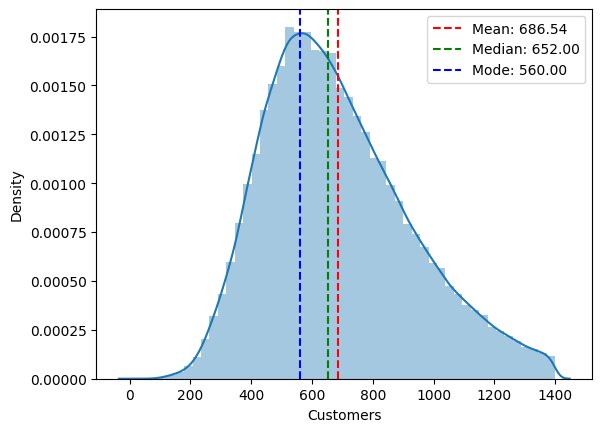

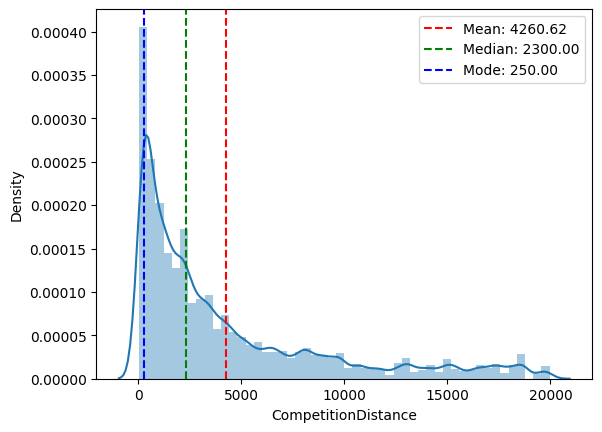

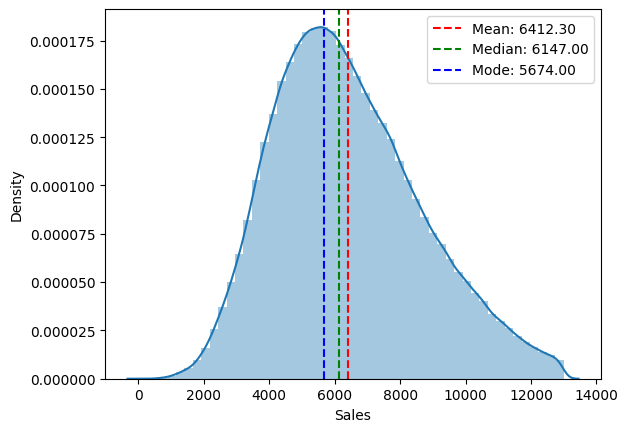

In [ ]:
# Let's find out skewness of continous feature
columns=['Customers','CompetitionDistance','Sales']
for col in columns:
  sns.distplot(new_df1[col])
  plt.axvline(new_df1[col].mean(), color='red', linestyle='--', label=f'Mean: {new_df1[col].mean():.2f}')
  plt.axvline(new_df1[col].median(), color='green', linestyle='--', label=f'Median: {new_df1[col].median():.2f}')
  plt.axvline(new_df1[col].mode()[0], color='blue', linestyle='--', label=f'Mode: {new_df1[col].mode()[0]:.2f}')
  plt.legend()
  plt.show()

Here we can see that each feature is rightly skewed,so let's apply sqrt tranformation.

In [ ]:
#TransFrom the data using SQRT transformation
new_df1['CompetitionDistance']=np.sqrt(new_df1['CompetitionDistance'])
new_df1['Customers']=np.sqrt(new_df1['Customers'])
new_df1['Sales']=np.sqrt(new_df1['Sales'])

# **6. Data Scaling**

In [ ]:
#before Scaling let's find out dependent and independent features
X=new_df1.drop(columns=['Sales']) #idependent Variable/feature
y=new_df1[['Sales']]                #Dependent Variable

In [ ]:
print(X.shape)
print(y.shape)

(743821, 13)
(743821, 1)


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#fit and transform
X=sc.fit_transform(X)

**Which method have you used to scale you data and why?**

For data scaling, I have been using StandardScaler from the scikit-learn library. Using this method, the data is transformed to have a mean of 0 and a standard deviation of 1.Putting every feature on the same scale is beneficial.Larger scale features may dominate the learning process or biased model training may arise from features with noticeably different scales.

# **8. Data Splitting**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((595056, 13), (148765, 13), (595056, 1), (148765, 1))

**What data splitting ratio have you used and why?**

As dataset is huge i have choosen 80-20 ratio. By allocating 80% of the data to the training set, we will get enough data to train the model and capture patterns and relationships in the data.

# ***7. ML Model Implementation***

**ML Model - 1**

# **Linear Regression**

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [ ]:
#coefficients
lr.coef_

array([[-0.02397298, 12.33191747,  2.902537  ,  0.06493884,  2.05083801,
         1.23023313,  0.28113626, -0.09348389, -0.57811979, -0.44229963,
         3.07925449, -1.1609663 ,  0.67659192]])

In [ ]:
#intercept
lr.intercept_

array([78.81893266])

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#let's define a function of metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [ ]:
# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 37.51823210825913
MSE test score is : 37.630118056399354
RMSE train Score:  6.125212821466625
RMSE test Score:  6.1343392518183535
r2 train score:  0.8123230112787846
r2 test score:  0.8127042266806126


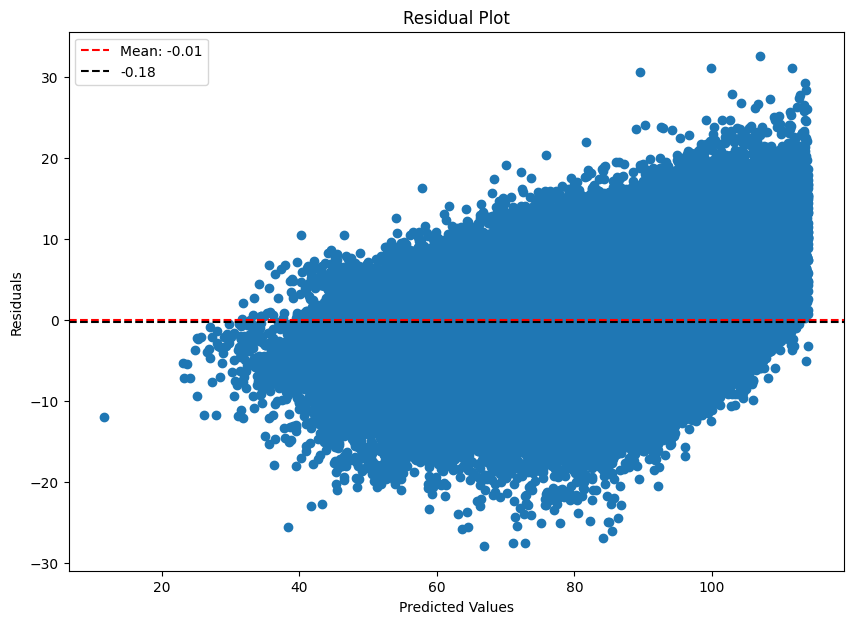

In [ ]:
#plot residuals
residuals=y_test-y_test_predict
plt.figure(figsize=(10,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 2)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

The linear regression model's respectable R-squared score of 81.2% shows that it has low MSE and RMSE on both the training and test samples and can explain a sizable amount of the variance in the target variable.Additionally plotted was the residual plot, which is a visual depiction of the variations between the actual values (y_test) and the predicted values (y_test_predict).It aids in the visvalization of the residual distribution.The residuals display a scattering of residuals around the mean or zero line, indicating the objectivity of the model prediction.


*  Let's move on to cross validation and hyperparameter tuning since the r2 score is not that high.





**2. Cross- Validation & Hyperparameter Tuning**

# **Ridge Regression**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 1}
best score: 0.8123104596941022


In [ ]:
# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)

MSE train score is : 37.518232108925616
MSE test score is : 37.63011864151609
RMSE train Score:  6.12521282152103
RMSE test Score:  6.134339299510265
r2 train score:  0.8123230112754506
r2 test score:  0.8127042237683206


Ridge Regression has shown same performance as of Linear Regression

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_lasso_pred = grid_search.predict(x_train)
y_test_lasso_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8117877462157403


In [ ]:
#calculating metrics for Lasso Regressions
cal_metrics_score(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

MSE train score is : 37.623297531638464
MSE test score is : 37.74946874154491
RMSE train Score:  6.133783296762159
RMSE test Score:  6.144059630370209
r2 train score:  0.8117974438101028
r2 test score:  0.812110184460574


Lasso Regression has also shown same result there is no improvement in performance

Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
enet= ElasticNet()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(enet, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_enet_pred = grid_search.predict(x_train)
y_test_enet_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8089863987517416


In [ ]:
#calculating metrics for ElasticNet Regression
cal_metrics_score(y_train,y_train_enet_pred,y_test,y_test_enet_pred)

MSE train score is : 38.18276980853534
MSE test score is : 38.32118739896979
RMSE train Score:  6.179220809174514
RMSE test Score:  6.190410923272363
r2 train score:  0.8089988025548851
r2 test score:  0.8092645785046474


Elastic Net has also shown around same results

**Which hyperparameter optimization technique have you used and why?**

I tuned hyperparameters using the GridSearchCV technique. It systematically looks through a predetermined set of hyperparameters, using cross-validation to assess the model's performance for each combination.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

I experimented with a number of regularization strategies, using Gridsearch CV as a hyperparameter, including Lasso, Ridge, and Elastic Net. But despite these efforts, I noticed that the R-squared score stays the same.Let's now attempt some intricate Models.



**ML Model - 2**

# **Decision Tree**

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 4.6555035461437475
MSE test score is : 13.729062757685115
RMSE train Score:  2.1576615921278637
RMSE test Score:  3.705274990832005
r2 train score:  0.9767118321566954
r2 test score:  0.9316665596877195


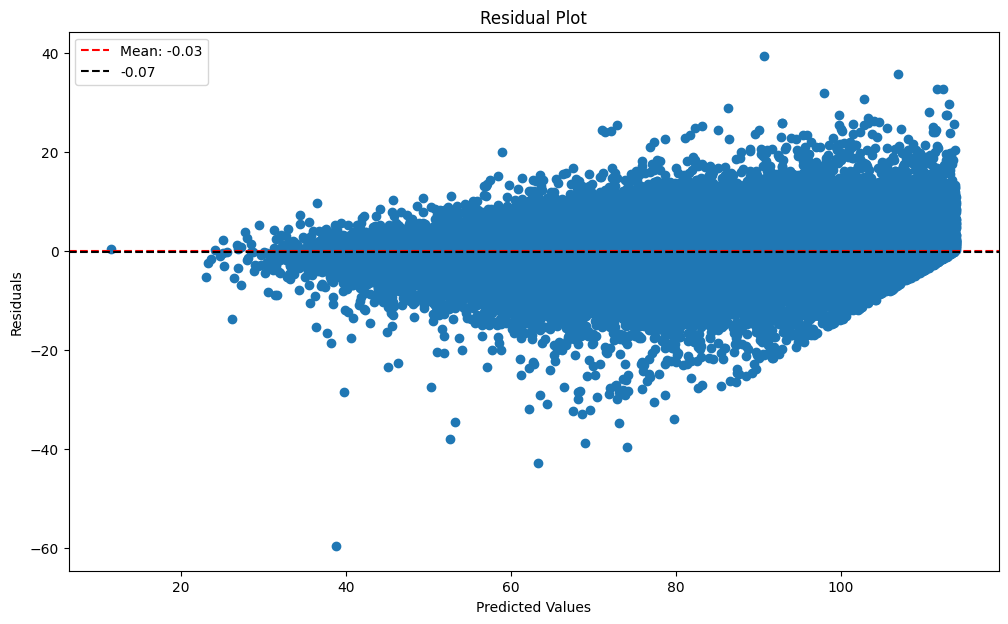

In [ ]:
#plot residuals
y_test_dtt_pred= y_test_dt_pred.reshape(-1,1)
residuals=y_test-y_test_dtt_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 2)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

With a high R2 score of 93.18% on the test data and 97.67% on the training data, the decision tree model with max depth of 20 has demonstrated excellent performance on both sets of data.The model predicts the average magnitude errors produced by the decision tree model with a comparatively low MSE and RMSE value of 13.68 and 3.69, respectively.The residuals plot demonstrates how the residuals are dispersed around the mean or zero line, demonstrating the objectivity of the model prediction.

Overall, the decision tree model shows good predictive performance, as evidenced by its high R2 scores, reasonably low MSE and RMSE scores, and accurate predictions as shown by the mean and median residuals.

Now let's use hyperparameter tuning to determine the model's ideal parameters for optimal performance.



**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
dt=DecisionTreeRegressor()
param_grid={'max_depth': [17,18,19,20], 'min_samples_leaf': [5,6,7,8], 'min_samples_split': [1,3,4,5]}
gridsearch=GridSearchCV(dt,param_grid,scoring='r2', cv=3)
gridsearch.fit(x_train,y_train)
# Predict on the model
y_train_dtgs_pred=gridsearch.predict(x_train)
y_test_dtgs_pred=gridsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',gridsearch.best_params_)
best_score = print('best score:',gridsearch.best_score_)

best param: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 4}
best score: 0.9325036433977306


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dtgs_pred,y_test,y_test_dtgs_pred)

MSE train score is : 7.169470074915346
MSE test score is : 12.143519871172481
RMSE train Score:  2.677586613896056
RMSE test Score:  3.4847553531306157
r2 train score:  0.9641362484643626
r2 test score:  0.9395582564561259


**Which hyperparameter optimization technique have you used and why?**

I tuned hyperparameters using the GridSearchCV technique. It methodically looks through a preset set of hyperparameters, uses cross-validation to assess the model's performance for each combination, and then selects the optimal set of parameters.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The decision tree model was further optimized following hyperparameter tuning with grid search CV and cross-validation. The optimal combination of hyperparameters was determined to be max_depth of 20, min_sample_leaf of 5, and min_samples_split of 3.We have created an ideal model with all of these combinations.

# **ML Model - Random Forest**

**ML Model - 1**

# **Linear Regression**

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# Fit the Algorithm
lr.fit(x_train,y_train)
# Predict on the model
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

In [ ]:
#coefficients
lr.coef_

array([[-0.02397298, 12.33191747,  2.902537  ,  0.06493884,  2.05083801,
         1.23023313,  0.28113626, -0.09348389, -0.57811979, -0.44229963,
         3.07925449, -1.1609663 ,  0.67659192]])

In [ ]:
#intercept
lr.intercept_

array([78.81893266])

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
#importing labraries to check the accuracy of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#let's define a function of metrics
def cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred):
  #mean_squared_error metrics
  MSE_train=mean_squared_error(y_train,y_train_pred)
  print('MSE train score is :',MSE_train)
  MSE_test=mean_squared_error(y_test,y_test_pred)
  print('MSE test score is :',MSE_test)

  #Root mean square error
  print('RMSE train Score: ',np.sqrt(MSE_train))
  print('RMSE test Score: ',np.sqrt(MSE_test))

  #R2 score
  r2_train=r2_score(y_train,y_train_pred)
  print('r2 train score: ',r2_train)
  r2_test=r2_score(y_test,y_test_pred)
  print('r2 test score: ',r2_test)

In [ ]:
# calculating metrics
cal_metrics_score(y_train,y_train_predict,y_test,y_test_predict)

MSE train score is : 37.51823210825913
MSE test score is : 37.630118056399354
RMSE train Score:  6.125212821466625
RMSE test Score:  6.1343392518183535
r2 train score:  0.8123230112787846
r2 test score:  0.8127042266806126


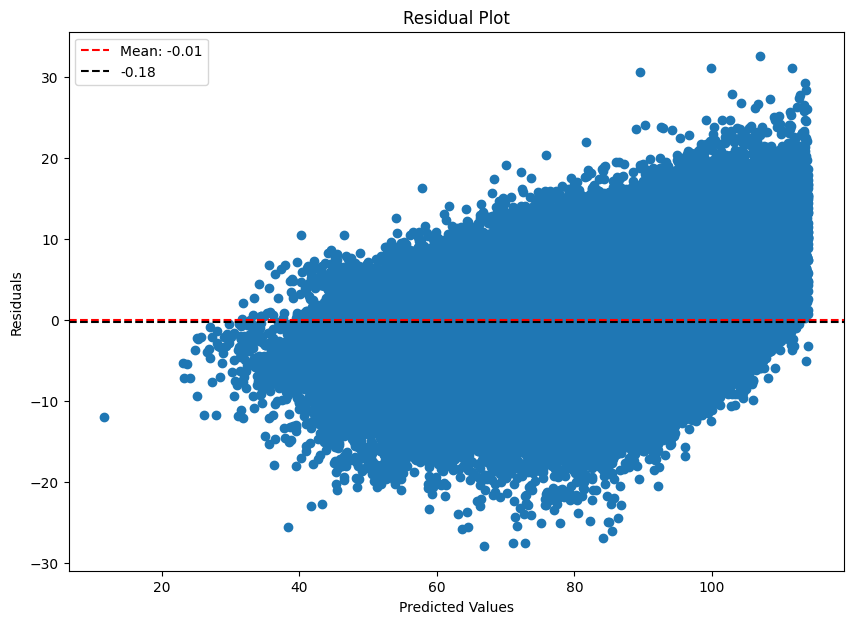

In [ ]:
#plot residuals
residuals=y_test-y_test_predict
plt.figure(figsize=(10,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 2)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

The linear regression model's respectable R-squared score of 81.2% shows that it has low MSE and RMSE on both the training and test samples and can explain a sizable amount of the variance in the target variable.Additionally plotted was the residual plot, which is a visual depiction of the variations between the actual values (y_test) and the predicted values (y_test_predict).It aids in the visvalization of the residual distribution.The residuals display a scattering of residuals around the mean or zero line, indicating the objectivity of the model prediction.

 Let's move on to cross validation and hyperparameter tuning since the r2 score is not that high.




**2. Cross- Validation & Hyperparameter Tuning**

# **Ridge Regression**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 1}
best score: 0.8123104596941022


In [ ]:
# calculating metrics for Ridge
cal_metrics_score(y_train,y_train_pred,y_test,y_test_pred)

MSE train score is : 37.518232108925616
MSE test score is : 37.63011864151609
RMSE train Score:  6.12521282152103
RMSE test Score:  6.134339299510265
r2 train score:  0.8123230112754506
r2 test score:  0.8127042237683206


Ridge Regression has shown same performance as of Linear Regression

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_lasso_pred = grid_search.predict(x_train)
y_test_lasso_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8117877462157403


In [ ]:
#calculating metrics for Lasso Regressions
cal_metrics_score(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

MSE train score is : 37.623297531638464
MSE test score is : 37.74946874154491
RMSE train Score:  6.133783296762159
RMSE test Score:  6.144059630370209
r2 train score:  0.8117974438101028
r2 test score:  0.812110184460574


Lasso Regression has also shown same result there is no improvement in performance

Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
enet= ElasticNet()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(enet, param_grid,scoring='r2',cv=5)
grid_search.fit(x_train,y_train)

# Predict on the model
y_train_enet_pred = grid_search.predict(x_train)
y_test_enet_pred = grid_search.predict(x_test)

# Retrieve the best hyperparameters and best score
best_params = print('best param:',grid_search.best_params_)
best_score = print('best score:',grid_search.best_score_)

best param: {'alpha': 0.1}
best score: 0.8089863987517416


In [ ]:
#calculating metrics for ElasticNet Regression
cal_metrics_score(y_train,y_train_enet_pred,y_test,y_test_enet_pred)

MSE train score is : 38.18276980853534
MSE test score is : 38.32118739896979
RMSE train Score:  6.179220809174514
RMSE test Score:  6.190410923272363
r2 train score:  0.8089988025548851
r2 test score:  0.8092645785046474


Elastic Net has also shown around same results

**Which hyperparameter optimization technique have you used and why?**

I tuned hyperparameters using the GridSearchCV technique. It systematically looks through a predetermined set of hyperparameters, using cross-validation to assess the model's performance for each combination.


**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

I experimented with a number of regularization strategies, using Gridsearch CV as a hyperparameter, including Lasso, Ridge, and Elastic Net. But despite these efforts, I noticed that the R-squared score stays the same.Let's now attempt some intricate Models.


**ML Model - 2**

# **Decision Tree**

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [ ]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20)
# Fit the Algorithm
dt.fit(x_train,y_train)
# Predict on the model
y_train_dt_pred=dt.predict(x_train)
y_test_dt_pred=dt.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dt_pred,y_test,y_test_dt_pred)

MSE train score is : 4.655503546143749
MSE test score is : 13.69960344603167
RMSE train Score:  2.157661592127864
RMSE test Score:  3.7012975354639717
r2 train score:  0.9767118321566954
r2 test score:  0.9318131870394945


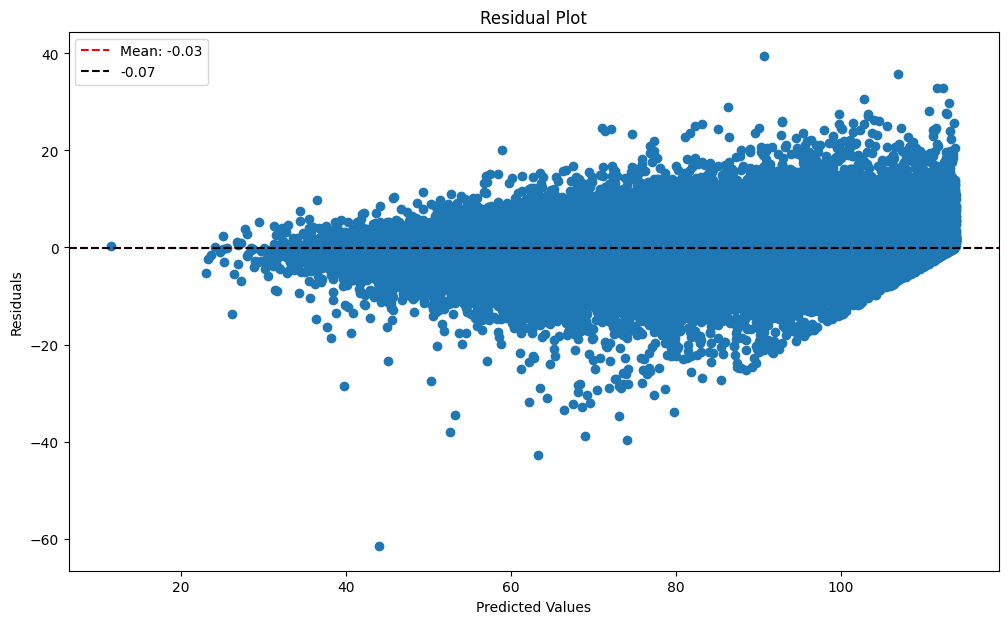

In [ ]:
#plot residuals
y_test_dtt_pred= y_test_dt_pred.reshape(-1,1)
residuals=y_test-y_test_dtt_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 2)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

With a high R2 score of 93.18% on the test data and 97.67% on the training data, the decision tree model with max depth of 20 has demonstrated excellent performance on both sets of data.The model predicts the average magnitude errors produced by the decision tree model with a comparatively low MSE and RMSE value of 13.68 and 3.69, respectively.The residuals plot demonstrates how the residuals are dispersed around the mean or zero line, demonstrating the objectivity of the model prediction.

Overall, the decision tree model shows good predictive performance, as evidenced by its high R2 scores, reasonably low MSE and RMSE scores, and accurate predictions as shown by the mean and median residuals.

Now let's use hyperparameter tuning to determine the model's ideal parameters for optimal performance.


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
dt=DecisionTreeRegressor()
param_grid={'max_depth': [17,18,19,20], 'min_samples_leaf': [5,6,7,8], 'min_samples_split': [1,3,4,5]}
gridsearch=GridSearchCV(dt,param_grid,scoring='r2', cv=3)
gridsearch.fit(x_train,y_train)
# Predict on the model
y_train_dtgs_pred=gridsearch.predict(x_train)
y_test_dtgs_pred=gridsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',gridsearch.best_params_)
best_score = print('best score:',gridsearch.best_score_)

best param: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}
best score: 0.9324927970432931


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_dtgs_pred,y_test,y_test_dtgs_pred)

MSE train score is : 7.169470074915346
MSE test score is : 12.14020293476656
RMSE train Score:  2.677586613896056
RMSE test Score:  3.4842793996415615
r2 train score:  0.9641362484643626
r2 test score:  0.9395747657896407


**Which hyperparameter optimization technique have you used and why?**

I tuned hyperparameters using the GridSearchCV technique. It methodically looks through a preset set of hyperparameters, uses cross-validation to assess the model's performance for each combination, and then selects the optimal set of parameters.


**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

The decision tree model was further optimized following hyperparameter tuning with grid search CV and cross-validation. The optimal combination of hyperparameters was determined to be max_depth of 20, min_sample_leaf of 5, and min_samples_split of 3.We have created an ideal model with all of these combinations.

**ML Model - Random Forest**

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=20)

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_train_rf_pred=rf.predict(x_train)
y_test_rf_pred=rf.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rf_pred,y_test,y_test_rf_pred)

MSE train score is : 3.661750291427629
MSE test score is : 8.820520499926326
RMSE train Score:  1.9135700382864562
RMSE test Score:  2.969936110411523
r2 train score:  0.9816828717792145
r2 test score:  0.9560977670695279


**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

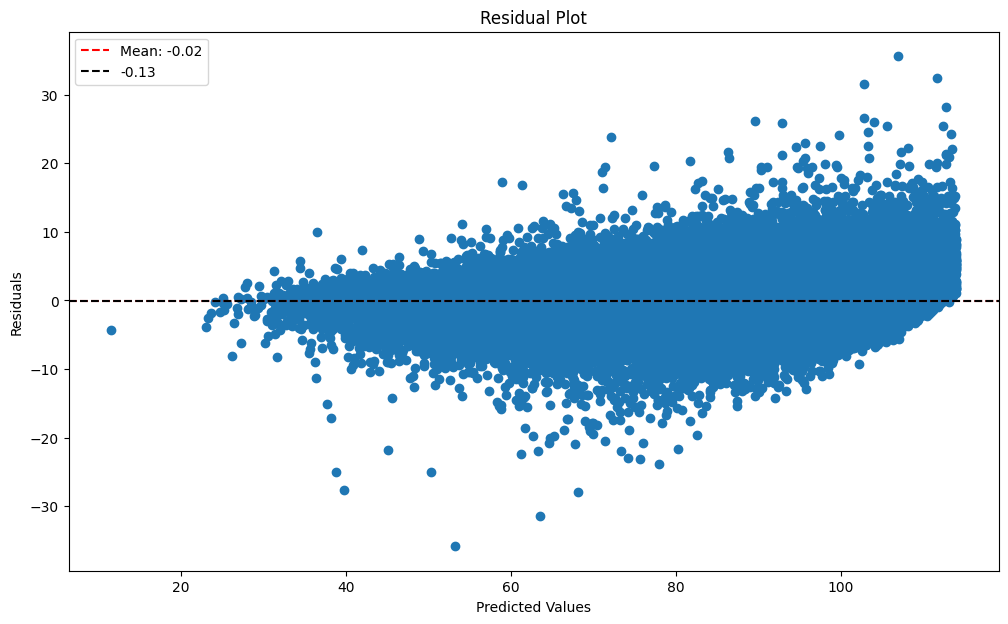

In [ ]:
#plot residuals
y_test_rff_pred= y_test_rf_pred.reshape(-1,1)
residuals=y_test-y_test_rff_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 2)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

I've now used the Random Forest model with 100 estimators and a maximum depth of 20 after using the Decision Tree method.Both the training and test data samples show that the model performs fairly well. The high r2 scores of 98% on the training sample and 95.6% on the test sample indicate that the model is effective in explaining the variance in the target variable for unseen data. The test sample also shows low MSE and RMSE of 8.7 and 2.96, respectively.It can also be seen from the residuals plot that the residuals are centered around zero.

In conclusion, the model performs admirably with n_estimator 0f 100 and max_depth of 20, producing a respectable r2_score.

To determine the ideal model's parameters, let's hypertune this one.


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Fit the Algorithm
rf=RandomForestRegressor()
param_grid={'n_estimators':[100],'max_depth':[18,19,20]}
rf_randomsearch=RandomizedSearchCV(rf,param_grid,scoring='neg_mean_squared_error',n_iter=3,n_jobs=-1,cv=3,verbose=2)
rf_randomsearch.fit(x_train,y_train)
# Predict on the model
y_train_rffgs_pred=rf_randomsearch.predict(x_train)
y_test_rfgs_pred=rf_randomsearch.predict(x_test)
# Retrieve the best hyperparameters and best score
best_params = print('best param:',rf_randomsearch.best_params_)
best_score = print('best score:',rf_randomsearch.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
best param: {'n_estimators': 100, 'max_depth': 20}
best score: -9.630124110758755


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_rffgs_pred,y_test,y_test_rfgs_pred)

MSE train score is : 3.664104786898199
MSE test score is : 8.810767264557132
RMSE train Score:  1.9141851495866848
RMSE test Score:  2.9682936621158515
r2 train score:  0.9816710939156256
r2 test score:  0.956146311688976


**Which hyperparameter optimization technique have you used and why?**

To fine-tune my model, I used the Random Search CV hyperparameter.As it does not evaluate every possible combination, it is more efficient than GridSearchCV when searching through a large hyperparameter space.


**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Upon utilizing Random Search CV for hyperparameter tuning, the optimal values discovered were max_depth = 20 and n_estimator = 100.The model produced nearly identical MSE, RMSE, and R2 scores.


# **Model 4 : XGBOOST**

In [ ]:
#import the algorithm
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=13)
#fit the algorithm
xgb.fit(x_train,y_train)
# Predict on the mode
y_train_xgb_pred=xgb.predict(x_train)
y_test_xgb_pred=xgb.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgb_pred,y_test,y_test_xgb_pred)

MSE train score is : 6.3967279489335
MSE test score is : 8.759634595193388
RMSE train Score:  2.529175349582053
RMSE test Score:  2.9596679873244884
r2 train score:  0.9680017268494803
r2 test score:  0.9564008134908576


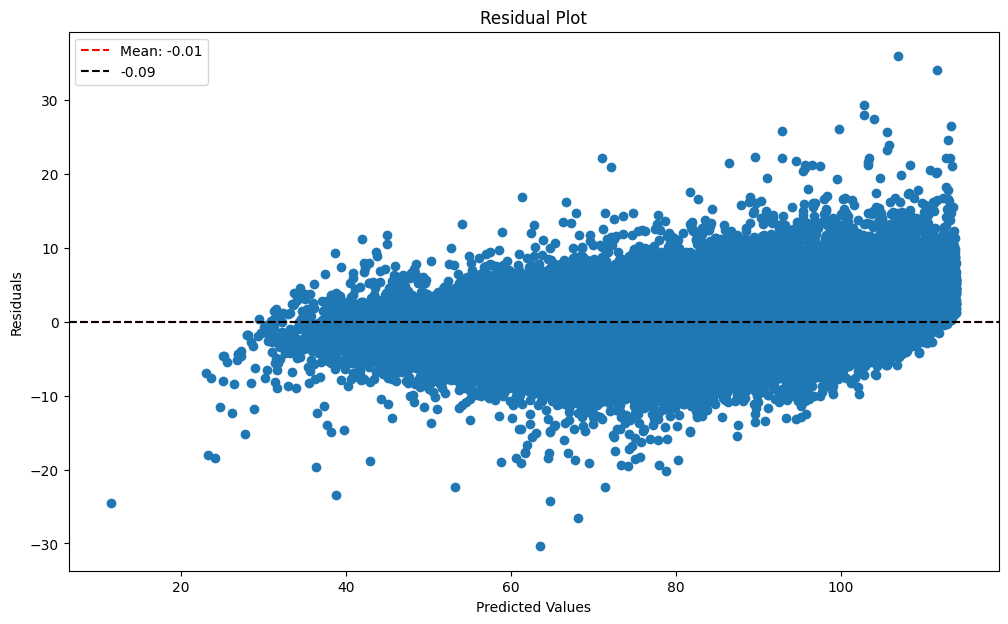

In [ ]:
#plot residuals
y_test_xgbb_pred= y_test_xgb_pred.reshape(-1,1)
residuals=y_test-y_test_xgbb_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f'Mean: {round(np.nanmean(residuals), 2)}')
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

The model displays an MSE train of 6.05 after applying XGBoost with 100 estimators, a learning rate of 0.1, and a maximum depth of 13. The RMSE train score, or square root of the MSE train score, is 2.46. The model's performance on the training set of data is indicated by these scores.The RMSE test score is 2.8 and the MSE test score is 7.89, respectively. These scores show how well the model performs with unknown data.

With an R2 score of 96.97 during training and 96.07 during testing, the model can account for roughly 96% of the variability in the target variable. A residual mean of 0 and residual variance of -0.09 are also displayed in the scatter plot.

In conclusion, the XGBoost model performs well, showing low MSE and RMSE scores and high R2 scores on both the training and test data. It has 100 estimators, a learning rate of 0.1, and a maximum depth of 13.

Now let's optimize the model's parameters and performance.


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[13,14,15]}

# Train the model
xgb_grid=GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_grid.fit(x_train,y_train)

# Predict the output
y_train_xgbg_pred = xgb_grid.predict(x_train)
y_test_xgbg_pred = xgb_grid.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print('best param',xgb_grid.best_params_)
print('best score',xgb_grid.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
best param {'learning_rate': 0.1, 'max_depth': 14}
best score -8.973213507671588


In [ ]:
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgbg_pred,y_test,y_test_xgbg_pred)

MSE train score is : 5.220844964559811
MSE test score is : 8.467055823435311
RMSE train Score:  2.284916839747086
RMSE test Score:  2.9098205826880994
r2 train score:  0.9738838317674033
r2 test score:  0.9578570610431808


The optimal parameters were determined to be learning rate of 0.1 and max_depth of 15, after applying Grid Search CV as the hypertune and cross validation parameters. Using 100 estimators, a learning rate of 0.1, and a maximum depth of 15 show good performance, with relatively low MSE and RMSE scores and high R2 scores on both the training and test data. The mean and median residual values being close to zero indicates that the model's predictions are generally accurate.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?



Examine a number of important metrics that evaluate machine learning models' performance.

The R2 score, sometimes referred to as the coefficient of determination, is one important statistic. Measuring the amount of variance in the target variable that the model can account for is helpful.For a precise result prediction, there must be a stronger correlation between the features and the target variable, which is indicated by a higher R2 score.

The Mean Squared Error (MSE), which calculates the average squared difference between the actual and predicted values, is another crucial metric. Reduced mean square error (MSE) indicates reduced prediction errors and increased precision in the model's forecasts. For businesses, reducing prediction errors is essential because it increases the dependability of decision-making.

The following metric is the Root Mean Squared Error (RMSE), which similarly gives an average measurement of the prediction errors in the target variable's original unit. Better prediction accuracy is indicated by a lower RMSE, much like with MSE.

We can also learn a lot by looking at the residuals, or the variations between the actual and predicted values. The model appears to capture the underlying patterns well if the residual plot behaves well, has a mean near zero, and shows no obvious patterns.

Businesses are able to evaluate the model's accuracy, dependability, and performance by taking these assessment metrics into account.

#### Which ML model did you choose from the above created models as your final prediction model and why?

I've decided to use the XGBoost model as the final prediction model based on how well each model performed overall. With a learning rate of 0.1 and a max_depth of 15 and 100 estimators, the XGBoost model performed better than the other models in a number of important areas, making it the model of choice for prediction.

First off, the training data showed a high r2 score of about 98% for the XGBoost model, and the test dataset showed a high r2 score of about 97%.

In comparison to the other models, the XGBoost model also produced lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values. The XGBoost model shows reduced prediction errors and increased accuracy in predicting the target variable, with an MSE of 4.7 and an RMSE of 2.7.

The R2 score, MSE, and RMSE are just a few of the evaluation metrics where the XGBoost model consistently performed well. Its strong performance on the test and training sets shows that it has good capabilities and lowers the chance of overfitting.

Furthermore, the analysis of the residuals showed that the mean and median values were 0 and -.09, respectively.The XGBoost model minimizes systematic errors and effectively captures the underlying patterns in the data, as demonstrated by the well-behaved residuals.

The XGBoost model is the recommended option for the final prediction model because of its strong predictive performance, lower prediction errors, and consistency across evaluation metrics.

 #### Explain the model which you have used and the feature importance using any model explainability tool?

There are two ways to explain the Model:

**Overall:** This provides a general explanation for the behavior of the model. It provides us with a broad overview of the model and demonstrates how various data features interact to influence the outcome. Consider feature importance.

**Locally:** This describes each instance and feature in the data separately, as well as how each feature influences the outcome (much like explaining observations observed at specific points in the model).For example, Lime, Shape




In [ ]:
# Plotting the barplot to find out which feature is contributing the most
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=15)
# Train your XGBoost model
model.fit(x_train,y_train)

# Get the feature importance scores
importance = model.feature_importances_

indices = np.argsort(importance)

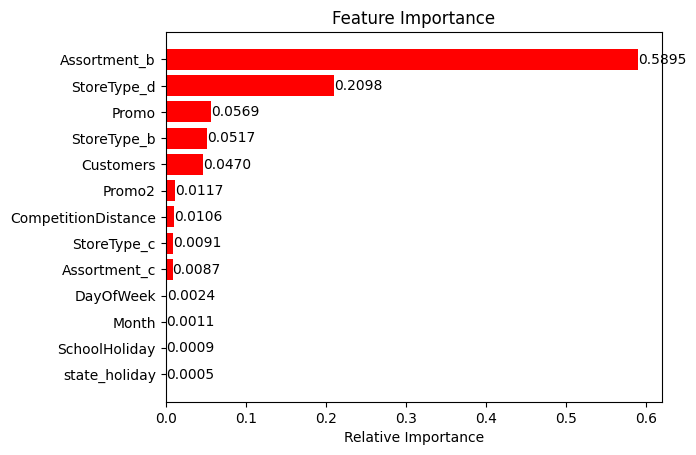

In [ ]:
features=new_df.columns
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='red', align='center')

# Add numeric values on top of the bars
for i, v in enumerate(importance[indices]):
    plt.text(v, i, f'{v:.4f}', color='black', va='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

To determine which features are crucial for the target feature's prediction, I used the feature importance method:

Around 45.6 percent of the total was found to be contributed by Assortment B, which was followed by Store Type D, Store Type B, Promo and Customers, and so on.

# **Conclusion**

### **EDA Conclusion**

EDA aids in the extraction of some insightful information from the data.Following are a few conclusions derived from the data:

1.It has been discovered that when any type of promotion is used, Day-1, or Monday, has the highest sales, and Day-7, or Sunday, has the lowest. During that time, sales nearly doubled.

2.Sales increased significantly after October, possibly as a result of festival season.December displays the highest sales, possibly as a result of Christmas and New Year's

3.It was discovered that store b's sales had stopped between 2013 and 2015, with store d having the highest sales in that year and store b having the highest sales in the remaining years.

4.The assortment b has the highest sales.

5.Additionally, it was noted that the majority of rival stores were close to one another and that sales were higher in the densely populated areas.

6.Sales aren't greatly impacted by school holidays, but they do increase slightly during that time.

7.Whether there was a state holiday or not, there were respectable sales on both occasions, and it was discovered that the state holiday only had a 3% impact on sales.Thus, overall sales are independent of state holidays.

8.Customers and sales have a positive correlation, meaning that the more times a customer visits the store, the higher the sales volume.

9.It was found that running promotions continuously has not been very effective in increasing sales.

10.However, open and customer relationships with sales indicate that if a store runs promotions, more customers will visit the store, which will increase sales.

11.State holidays have very little negative correlation with sales because they have no effect on sales; the same is true for school holidays.

### **ML Conclusion**

On my data, I have used the XGBoost model, Decision Tree, Random Forest, Ridge, Lasso, and Linear Regression techniques. I've decided to use the XGBoost model as the final prediction model based on how well each model performed overall. The XGBoost model is the recommended option for prediction because it performed better than the other models in a number of important areas.

With a learning rate of 0.1 and a max_depth of 15 and 100 estimators, the XGBoost model performed better than the other models in a number of important areas, making it the model of choice for prediction.

I First off, the training data showed a high r2 score of about 98% for the XGBoost model, and the test dataset showed a high r2 score of about 97%.

In comparison to the other models, the XGBoost model also produced lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values. The XGBoost model shows reduced prediction errors and increased accuracy in predicting the target variable, with an MSE of 4.7 and an RMSE of 2.7.

The R2 score, MSE, and RMSE are just a few of the evaluation metrics where the XGBoost model consistently performed well. Its strong performance on the test and training sets shows that it has good capabilities and lowers the chance of overfitting.

Furthermore, the analysis of the residuals showed that the mean and median values were 0 and -.09, respectively.The XGBoost model minimizes systematic errors and effectively captures the underlying patterns in the data, as demonstrated by the well-behaved residuals.

The XGBoost model is the recommended option for the final prediction model because of its strong predictive performance, lower prediction errors, and consistency across evaluation metrics.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***